<a href="https://colab.research.google.com/github/PawelJakubczyk/pyspark_note/blob/main/pyspark_crud_read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Liblary

In [ ]:
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=e9659495cc8fff9f62c9bf364268978451821482fda509435158e43edeaf6af6
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


# Read Pyspark DF

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType
from datetime import date

## Start Spark Session

In [ ]:
spark = SparkSession.builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

## Define Schema

In [ ]:
custom_schema = StructType(
    [
        StructField("ID", StringType(), False),
        StructField("Subsector", StringType()),
        StructField("Category", StringType()),
        StructField("Brand", StringType()),
        StructField("Material_ID", IntegerType()),
        StructField("Description", StringType()),
        StructField("Plant_Code", StringType()),
        StructField("Plant_Name", StringType()),
        StructField("Validity_Date_From", DateType()),
        StructField("Validity_Date_To", DateType()),
        StructField("Modification_Date", DateType()),
        StructField("Market_Value", IntegerType()),
        StructField("Status", StringType()),
    ]
)

## Sample Df

In [ ]:
# list  of college data with two lists
sample_data = [
    ("1", "Subsector A", "Category X", "Brand 1", 101, "Description 1", "Code 001", "Plant 1", date(2022, 1, 1), date(2022, 12, 31), date(2022, 1, 1), 14124 , "Active"),
    ("2", "Subsector B", "Category Y", "Brand 2", 102, "Description 2", "Code 002", "Plant 2", date(2022, 1, 1), date(2022, 12, 31), date(2022, 1, 1), 12564 , "Inactive"),
    ("3", "Subsector C", "Category Z", "Brand 3", 103, "Description 3", "Code 003", "Plant 3", date(2022, 1, 1), date(2022, 12, 31), date(2022, 1, 1), 57856 , "Active"),
    ("4", "Subsector A", "Category X", "Brand 1", 104, "Description 4", "Code 004", "Plant 4", date(2022, 1, 1), date(2022, 12, 31), date(2022, 1, 1), 13443 , "Inactive"),
    ("5", "Subsector B", "Category Y", "Brand 2", 105, "Description 5", "Code 005", "Plant 5", date(2022, 1, 1), date(2022, 12, 31), date(2022, 1, 1), 76445 , "Active")
]

# creating a dataframe
df_sample = spark.createDataFrame(sample_data, schema=custom_schema)

### Show Data

In [ ]:
df_sample.show()

+---+-----------+----------+-------+-----------+-------------+----------+----------+------------------+----------------+-----------------+------------+--------+
| ID|  Subsector|  Category|  Brand|Material_ID|  Description|Plant_Code|Plant_Name|Validity_Date_From|Validity_Date_To|Modification_Date|Market_Value|  Status|
+---+-----------+----------+-------+-----------+-------------+----------+----------+------------------+----------------+-----------------+------------+--------+
|  1|Subsector A|Category X|Brand 1|        101|Description 1|  Code 001|   Plant 1|        2022-01-01|      2022-12-31|       2022-01-01|       14124|  Active|
|  2|Subsector B|Category Y|Brand 2|        102|Description 2|  Code 002|   Plant 2|        2022-01-01|      2022-12-31|       2022-01-01|       12564|Inactive|
|  3|Subsector C|Category Z|Brand 3|        103|Description 3|  Code 003|   Plant 3|        2022-01-01|      2022-12-31|       2022-01-01|       57856|  Active|
|  4|Subsector A|Category X|Brand 

### Show Data

In [ ]:
df_sample.printSchema()

root
 |-- ID: string (nullable = false)
 |-- Subsector: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Brand: string (nullable = true)
 |-- Material_ID: integer (nullable = true)
 |-- Description: string (nullable = true)
 |-- Plant_Code: string (nullable = true)
 |-- Plant_Name: string (nullable = true)
 |-- Validity_Date_From: date (nullable = true)
 |-- Validity_Date_To: date (nullable = true)
 |-- Modification_Date: date (nullable = true)
 |-- Market_Value: integer (nullable = true)
 |-- Status: string (nullable = true)



## Describe Data

In [ ]:
df_sample.describe().show()

+-------+------------------+-----------+----------+-------+------------------+-------------+----------+----------+------------------+--------+
|summary|                ID|  Subsector|  Category|  Brand|       Material_ID|  Description|Plant_Code|Plant_Name|      Market_Value|  Status|
+-------+------------------+-----------+----------+-------+------------------+-------------+----------+----------+------------------+--------+
|  count|                 5|          5|         5|      5|                 5|            5|         5|         5|                 5|       5|
|   mean|               3.0|       NULL|      NULL|   NULL|             103.0|         NULL|      NULL|      NULL|           34886.4|    NULL|
| stddev|1.5811388300841898|       NULL|      NULL|   NULL|1.5811388300841898|         NULL|      NULL|      NULL|30182.387070939236|    NULL|
|    min|                 1|Subsector A|Category X|Brand 1|               101|Description 1|  Code 001|   Plant 1|             12564|  Active|

## Filter Data

In [ ]:
active_rows = df_sample.filter(df_sample["Status"] == "Active")
active_rows.show()

+---+-----------+----------+-------+-----------+-------------+----------+----------+------------------+----------------+-----------------+------------+------+
| ID|  Subsector|  Category|  Brand|Material_ID|  Description|Plant_Code|Plant_Name|Validity_Date_From|Validity_Date_To|Modification_Date|Market_Value|Status|
+---+-----------+----------+-------+-----------+-------------+----------+----------+------------------+----------------+-----------------+------------+------+
|  1|Subsector A|Category X|Brand 1|        101|Description 1|  Code 001|   Plant 1|        2022-01-01|      2022-12-31|       2022-01-01|       14124|Active|
|  3|Subsector C|Category Z|Brand 3|        103|Description 3|  Code 003|   Plant 3|        2022-01-01|      2022-12-31|       2022-01-01|       57856|Active|
|  5|Subsector B|Category Y|Brand 2|        105|Description 5|  Code 005|   Plant 5|        2022-01-01|      2022-12-31|       2022-01-01|       76445|Active|
+---+-----------+----------+-------+----------

## Average per category

In [ ]:
from pyspark.sql.functions import avg

avg_material_id = df_sample.groupBy("Category").agg(avg("Market_Value").alias("Avg_Market_Value"))
avg_material_id.show()

+----------+----------------+
|  Category|Avg_Market_Value|
+----------+----------------+
|Category X|         13783.5|
|Category Y|         44504.5|
|Category Z|         57856.0|
+----------+----------------+



## Data charts

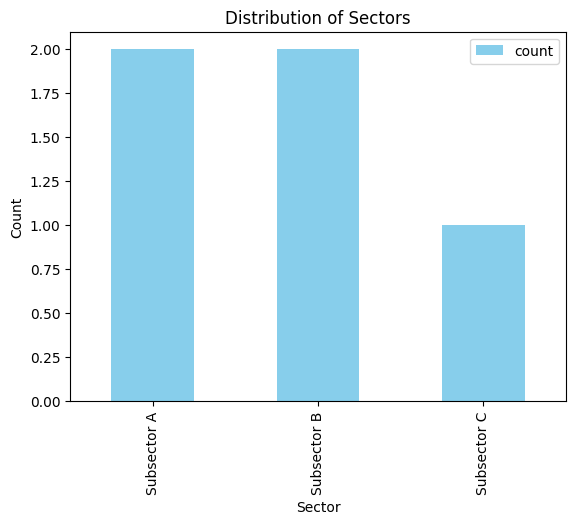

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

subsector_counts = df_sample.groupBy("Subsector").count().toPandas()
subsector_counts.plot(kind="bar", x="Subsector", y="count", color='skyblue')
plt.title("Distribution of Sectors")
plt.xlabel("Sector")
plt.ylabel("Count")
plt.show()


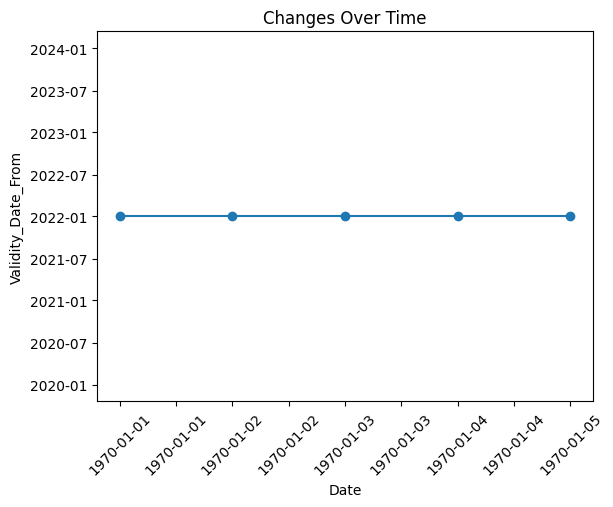

In [ ]:
validity_dates = df_sample.select("Validity_Date_From").toPandas()
validity_dates["Validity_Date_From"] = pd.to_datetime(validity_dates["Validity_Date_From"])

plt.plot(validity_dates["Validity_Date_From"], marker='o', linestyle='-')
plt.title("Changes Over Time")
plt.xlabel("Date")
plt.ylabel("Validity_Date_From")
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))  # Formatting the date on x-axis
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()


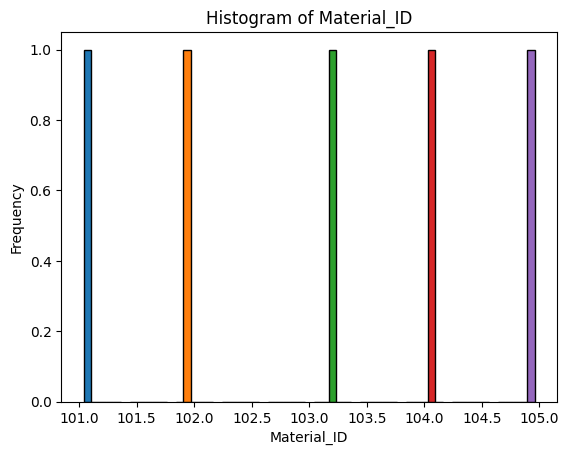

In [ ]:
plt.hist(df_sample.select("Material_ID").collect(), bins=10, edgecolor='black')
plt.title("Histogram of Material_ID")
plt.xlabel("Material_ID")
plt.ylabel("Frequency")
plt.show()


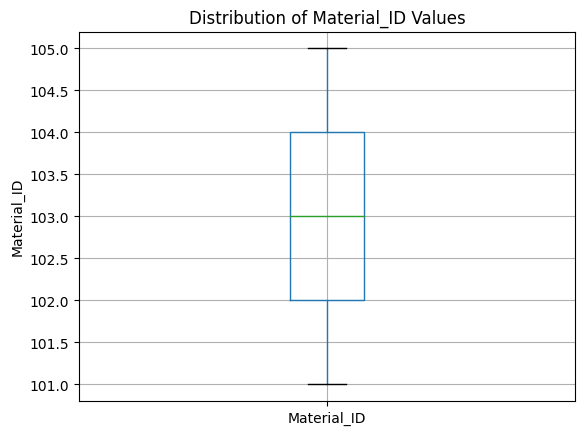

In [ ]:
material_id_values = df_sample.select("Material_ID").toPandas()
material_id_values.boxplot()
plt.title("Distribution of Material_ID Values")
plt.ylabel("Material_ID")
plt.show()


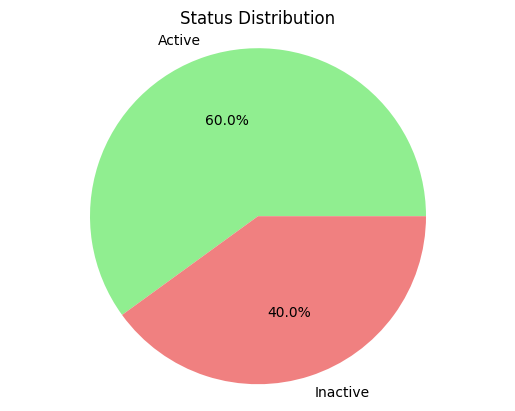

In [ ]:
status_counts = df_sample.groupBy("Status").count().toPandas()
plt.pie(status_counts["count"], labels=status_counts["Status"], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Status Distribution")
plt.axis('equal')
plt.show()
